In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/approxCollection.csv")

In [3]:
df

,Reward,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6
0,"(0.6521739130434783, 23, 14)",2.3,3.3,2.9,3.3,2.8,3.9,3.0
1,"(0.5873015873015872, 21, 12)",2.3,2.9,2.3,2.8,2.3,3.4,3.8
2,"(0.5714285714285714, 21, 11)",2.3,2.9,2.3,2.8,2.3,3.3,3.8
3,"(0.5714285714285714, 21, 11)",2.3,2.9,2.4,2.8,2.3,3.3,3.8
4,"(0.5714285714285714, 21, 11)",2.3,2.9,2.3,2.8,2.4,3.3,3.8
...,...,...,...,...,...,...,...,...
2034,"(0.45, 20, 8)",2.2,2.8,2.9,2.6,2.5,2.4,3.8
2035,"(0.45, 20, 8)",2.2,2.8,2.9,2.6,2.6,2.4,3.8
2036,"(0.45, 20, 8)",2.2,2.8,2.9,2.6,2.7,2.4,3.8
2037,"(0.45, 20, 8)",2.2,2.8,2.9,2.6,2.7,2.4,3.7


In [2]:
from itertools import chain
featureIds = [['1','2','3','4'],['5','6'],['7']]
list(chain(*featureIds))

['1', '2', '3', '4', '5', '6', '7']

In [ ]:
# split the element in the first column, which is a tuple as a string into 3 columns and cast the values to float
df[['Reward', 'TP', 'FP']] = df['Reward'].str.strip('()').str.split(',', expand=True).astype(float)

In [7]:
# cast the values of the columns TP and FP to int
df[['TP', 'FP']] = df[['TP', 'FP']].astype(int)

In [10]:
df.to_csv("../data/approxCollection.csv", index=False)

In [7]:
df0 = pd.read_csv("../data/approxLarge.csv")
df1 = pd.read_csv("../data/approxWobly.csv")
df2 = pd.read_csv("../data/approx1000.csv")
df3 = pd.read_csv("../data/approxXd.csv")
df4 = pd.read_csv("../data/approx200.csv")
df2 = df2.drop(columns=["Step"])
df4 = df4.drop(columns=["Step"])
dfs = [df0, df1, df2, df3, df4]

In [35]:
# df.Reward = df.Reward.round(3)
df = df.drop_duplicates()

In [6]:
df.sort_values(by=['REWARD'], ascending=False).head(10)#.to_csv("../data/top10.csv", index=False)
#df[df["Reward"] == df["Reward"].max()]

,AUC,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,TP,FP,EF,REWARD
15447,0.728919,1.3,3.3,1.7,1.5,2.5,3.4,3.3,18.0,4.0,0.818182,1.547100
8894,0.767113,4.2,1.6,2.0,1.5,1.9,3.7,1.9,21.0,6.0,0.777778,1.544891
8893,0.767113,4.2,1.6,2.0,1.5,1.9,3.6,1.9,21.0,6.0,0.777778,1.544891
8856,0.766121,4.2,1.7,2.0,1.5,1.8,3.5,2.3,21.0,6.0,0.777778,1.543899
15100,0.765377,2.4,3.4,2.0,1.6,2.4,3.2,3.3,21.0,6.0,0.777778,1.543155
15099,0.765377,2.4,3.4,2.1,1.6,2.4,3.2,3.3,21.0,6.0,0.777778,1.543155
15101,0.765377,2.4,3.4,1.9,1.6,2.4,3.2,3.3,21.0,6.0,0.777778,1.543155
15097,0.765129,2.3,3.4,2.1,1.7,2.4,3.2,3.3,21.0,6.0,0.777778,1.542907
15104,0.765129,2.3,3.4,2.0,1.7,2.5,3.2,3.3,21.0,6.0,0.777778,1.542907
15096,0.765129,2.3,3.4,2.1,1.7,2.4,3.2,3.2,21.0,6.0,0.777778,1.542907


In [2]:
!pip install gymnasium

  Using cached gymnasium-0.28.1-py3-none-any.whl (925 kB)
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl (2.5 kB)
  Using cached jax_jumpy-1.0.0-py3-none-any.whl (20 kB)



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from gymnasium.envs.registration import register
import gymnasium as gym
register(
    # unique identifier for the env `name-version`
    id="PharmacophoreEnv-v0",
    # path to the class for creating the env
    entry_point="customenv:PharmacophoreEnv",
    max_episode_steps=200,
    # Max number of steps per episode, using a `TimeLimitWrapper`
    kwargs={
        "output": r'C:\\Users\\kilia\\MASTER\\rlpharm\\data\\hitlists\\hitlist', 
        "querys": r'C:\\Users\\kilia\\MASTER\\rlpharm\\data\\querys\\sEH-1ZD5_mod5_LS_3.02.pml', 
        "actives_db": r'C:\\Users\\kilia\\MASTER\\rlpharm\\data\\ldb2s\\actives_mini.ldb2',
        "inactives_db": r"C:\\Users\\kilia\\MASTER\\rlpharm\\data\\ldb2s\\inactives_mini.ldb2",
        "approximator": r"C:\Users\kilia\MASTER\rlpharm\data\models\approximator\best.pt",
        "ldba": 36,
        "ldbi": 112,
        "features": "H,HBA,HBD",
        "enable_approximator": False,
        "hybrid_reward": True,
        "inf_mode": False
        },
)
env = gym.make("PharmacophoreEnv-v0")

In [3]:
env.obs_to_pml([2.4,2.7,2.4,1.7,1.4,1,2.4], filename=r'C:\\Users\\kilia\\MASTER\\rlpharm\\data\\querys\\sEH-1ZD5_mod5_LS_3.02_infer_best.pml')

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

def generate_violin_plots(dataframe):
    fig, axes = plt.subplots(nrows=1, ncols=len(dataframe.columns), figsize=(15, 5))
    fig.subplots_adjust(wspace=0.5)

    for i, column in enumerate(dataframe.columns):
        sns.violinplot(y=dataframe[column], ax=axes[i])
        axes[i].set_title(column)
    
    plt.show()

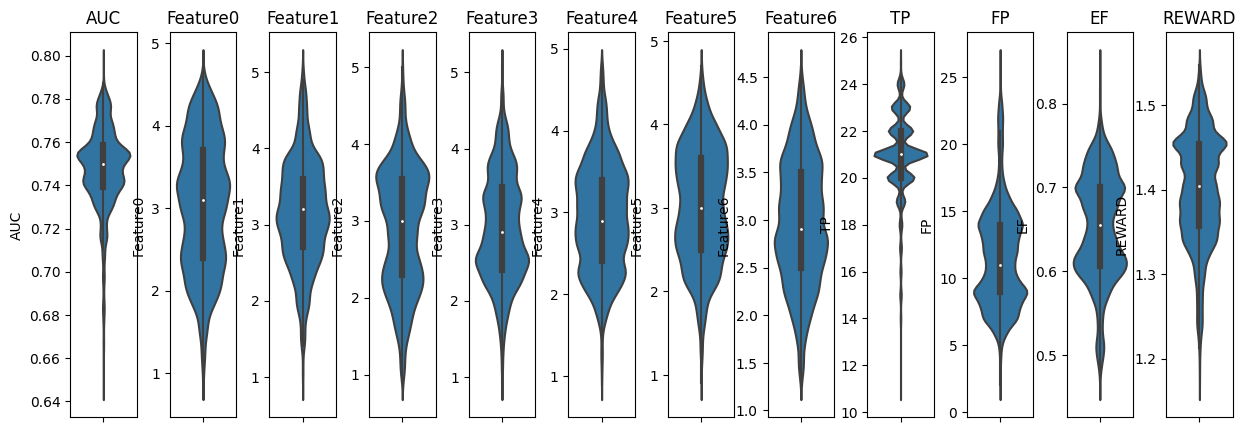

In [8]:
generate_violin_plots(df)

In [45]:
def scoring(actives, inactives):
    """
    Calculate score
    :return: score query pharmacophores against actives and inactives database        
    """       
    if actives == 0:
        return 0
    EF = (actives/(actives+inactives))/(58/(58+177))
    print(EF)
    if inactives == 0:
        inactives = 1
    score = (EF + actives) / (inactives)
    return score


In [46]:
scoring(14,4)

3.1513409961685825


4.287835249042145

In [11]:
bdf = pd.concat(dfs)
bdf = bdf.drop_duplicates()

In [13]:
bdf = bdf[(bdf.Feature0 > 1) & (bdf.Feature1 > 1) & (bdf.Feature2 > 1) & (bdf.Feature3 > 1) & (bdf.Feature4 > 1) & (bdf.Feature5 > 1) & (bdf.Feature6 > 1)]
bdf = bdf[(bdf.Feature0 < 6) & (bdf.Feature1 < 6) & (bdf.Feature2 < 6) & (bdf.Feature3 < 6) & (bdf.Feature4 < 6) & (bdf.Feature5 < 6) & (bdf.Feature6 < 6)]

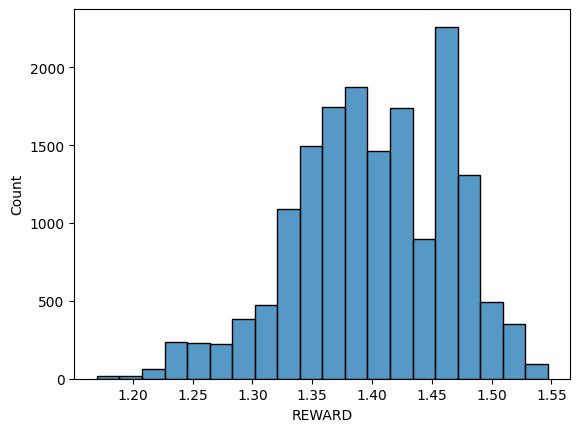

In [10]:
#sns.pairplot(data=bdf)
# histogram of rewards
sns.histplot(data=df, x="REWARD", bins=20)
plt.show()

In [20]:
bdf = bdf.sample(frac=1).reset_index(drop=True)
bdf.to_csv("../data/approxCollection.csv", index=False)

In [29]:
df.to_csv("../data/approxCollection.csv", index=False)